In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_process import arma_generate_sample
from ipywidgets import interact

plt.rcParams["figure.figsize"] = (14, 4)

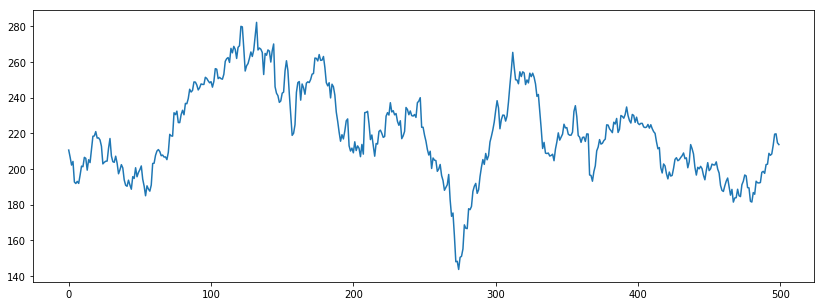

In [81]:
df = pd.read_csv('/home/tot/_tot/projects/data/tesla.csv', index_col='Date', parse_dates=['Date'])
ds = df['Close'][-500:].values
plt.plot(ds)

[ 1.         -1.16866199  0.19233176] [ 1.         -0.11252948] 219.068937083


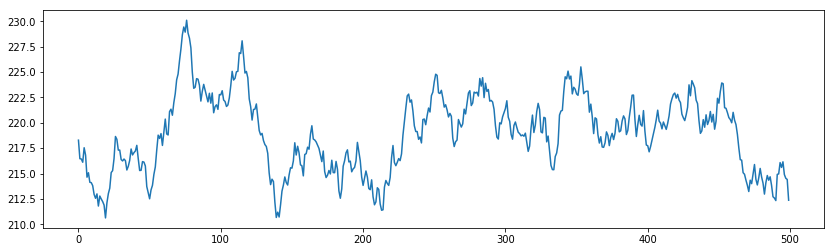

In [277]:
def get_arma_generate_args(arr, order=(2, 1)):
    arma_mod = sm.tsa.ARMA(arr, order).fit(disp=False, maxiter=50000)
    arparams = np.r_[1, -arma_mod.params[1:order[0]+1]]
    maparams = np.r_[1, arma_mod.params[-order[0]+1:]]
    return arparams, maparams, arma_mod.params[0]
arparams, maparams, mean = get_arma_generate_args(ds, (2, 1))
y = arma_generate_sample(arparams, maparams, 500) + mean
plt.plot(y)
print(arparams, maparams, mean)

In [284]:
range = 3
@interact(x=(-range, range, range / 20))
def f(x):
    np.random.seed(123)
    arparams[1] = x
    y = arma_generate_sample(arparams, maparams, 500) + mean
    plt.plot(y)

interactive(children=(FloatSlider(value=0.0, description='x', max=3.0, min=-3.0, step=0.15), Output()), _dom_classes=('widget-interact',))

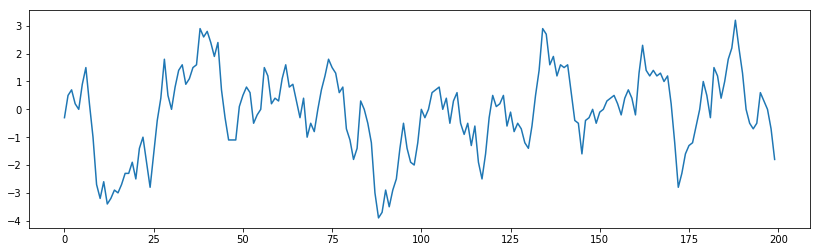

In [251]:
filename = '/_tot/_tot/_ARCHIVE/_5_WORK/БНТУ/Случайный микропрофиль/расчеты/profMathcad.xls'
pr = pd.read_excel(filename)
pr = pr.iloc[:, 1].values
plt.plot(pr[:200])
# help(pd.read_excel)

[ 1.         -1.65851954  0.69209138] [ 1.         -0.13870413] -0.114458508114


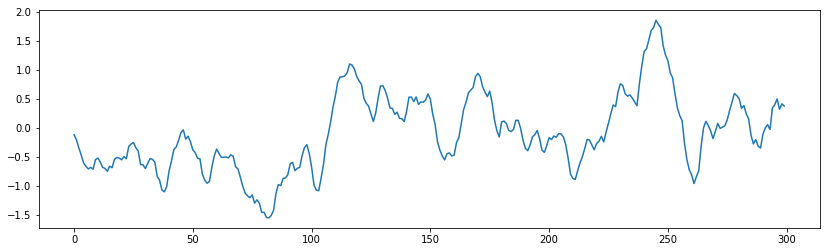

In [288]:
arparams, maparams, mean = get_arma_generate_args(pr, (2, 2))

# arparams = [1.,         -1.97209666,  0.97254752]
# maparams = [ 1.,         -0.07346866]
y = arma_generate_sample(arparams, maparams, 300) * mean
plt.plot(y)
print(arparams, maparams, mean)